# Assignment 1

![](https://media.giphy.com/media/xT9C25UNTwfZuk85WP/giphy-downsized-large.gif)

Remember the rules of ~Fight~ Code Club:
1. ALWAYS DOCUMENT
2. Cite resources that you use (paste links)
3. Include the names people who you worked with
4. Be neat and organized

## Scrape and Clean data

Based on you proposal, scrape or collect your data:

1. One variable must be either: (40 pts)
    1. scraped from the web OR;
    2. collected from an API AND you must create one new variable that is "new" to the best of your knowledge (combination of other variables representing something new).

2. You must have at least 3 variables, but you may include as many as you want into you final dataset. Likely, you will want to include more to make graphs and regressions. (30pts)

3. You must *be able* to run a regression that makes some sense with this data (the regression doesn't have to be a complete model). Briefly describe one regression you would run with your variables. (**DO NOT** run a regression, yet). (15pts)

4. You must have one combined and cleaned dataset (15 pts)

You must submit one python notebook on how you scraped/gathered data from an api, and how you combined and cleaned you data. I should be able to run your code and reproduce your final data set.  

The other variables that you choose to include do not have to be collected by API or webscraped, but you do have to combine the files and clean the dataset with python.

Thus, you must submit:
- Your finalized data set (only one) (note: you may add more variables in the future).
- Your documented python notebook
- Any associated data files needed to produce the final dataset.

You will be evaluated on:
- Completeness of the data
- Quality of the code 
- The creativity of the new variable/webscraped data you gather

Be sure to upload ALL associated files for your code to run. I will run your code from beginning to end - make it easy for me to replicate your code.

In [1]:
import requests 
import pandas as pd

from datetime import datetime 

In [2]:

#Getting gun/ shooting related crimes over time 2006-25 from NYC open data.

response = requests.get('https://data.cityofnewyork.us/resource/833y-fsy8.json?$limit=1000000')
print(response)

json_data = response.json()
dfG = pd.DataFrame(json_data)


<Response [200]>


In [5]:
dfG

,incident_key,occur_date,occur_time,boro,loc_of_occur_desc,precinct,jurisdiction_code,loc_classfctn_desc,location_desc,statistical_murder_flag,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer
0,298699604,2024-12-31T00:00:00.000,19:16:00,BROOKLYN,OUTSIDE,69,0,STREET,(null),False,...,"1,015,120","173,870",40.643866,-73.888761,"{'type': 'Point', 'coordinates': [-73.888761, ...",2,8,42,13827,5
1,298699604,2024-12-31T00:00:00.000,19:16:00,BROOKLYN,OUTSIDE,69,0,STREET,(null),False,...,"1,015,120","173,870",40.643866,-73.888761,"{'type': 'Point', 'coordinates': [-73.888761, ...",2,8,42,13827,5
2,298672094,2024-12-30T00:00:00.000,12:15:00,BRONX,OUTSIDE,52,0,STREET,(null),False,...,"1,017,719","260,875",40.882661,-73.878964,"{'type': 'Point', 'coordinates': [-73.878964, ...",5,40,34,11605,24
3,298672096,2024-12-30T00:00:00.000,16:45:00,BRONX,OUTSIDE,47,0,STREET,(null),False,...,"1,021,316","259,277",40.878261,-73.865964,"{'type': 'Point', 'coordinates': [-73.865964, ...",5,2,30,11605,29
4,298672096,2024-12-30T00:00:00.000,16:45:00,BRONX,OUTSIDE,47,0,STREET,(null),False,...,"1,021,316","259,277",40.878261,-73.865964,"{'type': 'Point', 'coordinates': [-73.865964, ...",5,2,30,11605,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29739,9953250,2006-01-01T00:00:00.000,02:34:00,QUEENS,NaN,114,0,NaN,BAR/NIGHT CLUB,True,...,1002576.750000000000000,221583.453125000000000,40.774860941000043,-73.933832584999948,"{'type': 'Point', 'coordinates': [-73.93383258...",3,4,72,16859,39
29740,9953245,2006-01-01T00:00:00.000,02:00:00,BRONX,NaN,48,0,NaN,NONE,False,...,1013404.562500000000000,251800.750000000000000,40.857769822000080,-73.894607459999975,"{'type': 'Point', 'coordinates': [-73.89460745...",5,22,29,10936,6
29741,139716503,2006-01-01T00:00:00.000,12:30:00,BROOKLYN,NaN,77,0,NaN,PVT HOUSE,True,...,996441.562500000000000,184160.359375000000000,40.672154209000041,-73.956051504999948,"{'type': 'Point', 'coordinates': [-73.95605150...",2,48,49,17618,16
29742,9953246,2006-01-01T00:00:00.000,05:51:00,BRONX,NaN,44,0,NaN,NONE,False,...,1007418.000000000000000,243859.218750000000000,40.835990401000061,-73.916276358999937,"{'type': 'Point', 'coordinates': [-73.91627635...",5,42,27,10934,50


In [7]:

#Using datetime import to make a new data frame of the occur date column. Assigning start date and end date

dfG['occur_date'] = pd.to_datetime(dfG['occur_date'])
start_date = datetime(2008, 1, 1)
end_date = datetime(2018, 12, 31)

#Looking for the first instance of a shooting withing the time frame and the end date 

before_df = dfG[(dfG['occur_date'] >= start_date) & (dfG['occur_date'] <= end_date)]
sorted_df = before_df.sort_values('occur_date')

#  Creating a new DF with the colomns i need
restricted_column_df1 = sorted_df[['occur_date', 'boro']]

print(restricted_column_df1)

      occur_date       boro
25801 2008-01-01     QUEENS
25783 2008-01-01      BRONX
25784 2008-01-01      BRONX
25785 2008-01-01  MANHATTAN
25786 2008-01-01   BROOKLYN
...          ...        ...
9078  2018-12-30   BROOKLYN
9077  2018-12-30     QUEENS
9076  2018-12-30   BROOKLYN
9075  2018-12-31  MANHATTAN
9074  2018-12-31      BRONX

[16728 rows x 2 columns]


In [102]:

#I want average age per borough (men/ boys between 15-24 are more likely to commit gun related) have it 

#average income level for each borough to control for income level have it 

#education level in area (borough) have it 

#Police presence in the area 




In [9]:

median_income = pd.read_csv('C:/Users/Owner/OneDrive/Desktop/Pace fall 24/Ind Study/Data Sets/median house hold income NY counties.csv')

In [11]:
median_income

,date,"Albany County, NY","Bronx County, NY","Chautauqua County, NY","Dutchess County, NY","Erie County, NY","Essex County, NY","Hamilton County, NY","Jefferson County, NY","Kings County, NY",...,"Putnam County, NY","Queens County, NY","Richmond County, NY","Rockland County, NY","Saratoga County, NY","Steuben County, NY","Suffolk County, NY","Tompkins County, NY","Wayne County, NY","Westchester County, NY"
0,2012.0,57951.0,32510.0,41194.0,66677.0,50370,45676.0,44957.0,46008.0,44850.0,...,92950.0,54373.0,70295.0,81517.0,66677.0,46110.0,85717.0,49159.0,48991.0,77166.0
1,2013.0,55778.0,33079.0,40468.0,69300.0,51123,46337.0,45737.0,46510.0,47067.0,...,92014.0,56307.0,68621.0,80132.0,69917.0,46540.0,84940.0,49457.0,50603.0,83094.0
2,2014.0,60371.0,33687.0,41757.0,70925.0,50134,50182.0,49137.0,49781.0,47547.0,...,94334.0,56866.0,70299.0,83162.0,71885.0,46849.0,85886.0,51880.0,49191.0,83152.0
3,2015.0,57312.0,35102.0,43973.0,71348.0,52176,52282.0,47997.0,50179.0,51026.0,...,90497.0,60241.0,71058.0,84249.0,75029.0,47352.0,87634.0,55839.0,51273.0,85688.0
4,2016.0,61634.0,37355.0,42664.0,73680.0,54175,50506.0,52134.0,46206.0,54793.0,...,96267.0,61844.0,75524.0,84358.0,75904.0,50190.0,92310.0,55778.0,58521.0,89380.0
5,2017.0,65659.0,37377.0,45840.0,76955.0,55581,52741.0,51520.0,47436.0,56548.0,...,98765.0,64046.0,78466.0,87873.0,82732.0,50807.0,94108.0,56539.0,52709.0,90483.0
6,2018.0,64536.0,38566.0,45689.0,79604.0,56375,54376.0,59020.0,52798.0,60862.0,...,100887.0,68432.0,79719.0,88960.0,83210.0,54862.0,100075.0,57383.0,61118.0,94521.0
7,2019.0,69408.0,41470.0,50143.0,84564.0,60620,55091.0,60148.0,53829.0,66501.0,...,105600.0,72975.0,86624.0,99831.0,89071.0,53167.0,105241.0,59176.0,61989.0,101741.0
8,2020.0,70629.0,44906.0,50062.0,79276.0,59584,57129.0,56253.0,57570.0,70390.0,...,104285.0,78847.0,81003.0,94874.0,83427.0,54794.0,109084.0,65308.0,62329.0,103340.0
9,2021.0,74512.0,43143.0,48102.0,87370.0,63014,62884.0,57427.0,59430.0,66943.0,...,107014.0,72807.0,84744.0,98054.0,87154.0,57584.0,112681.0,65402.0,65299.0,109131.0


In [13]:


from datetime import datetime
import pandas as pd

file_path = 'C:/Users/Owner/OneDrive/Desktop/Pace fall 24/Ind Study/Data Sets/median house hold income NY counties.csv'  
median_income = pd.read_csv(file_path)

median_income['date'] = pd.to_numeric(median_income['date'], errors='coerce')

median_income['date'] = pd.to_datetime(median_income['date'], format='%Y', errors='coerce')

# Defininge time range
start1_date = datetime(2012, 1, 1)
end1_date = datetime(2018, 12, 31)

# Filter rows by date range
filtered_df = median_income[(median_income['date'] >= start1_date) & (median_income['date'] <= end1_date)]

# Sort by date
sorted_df = filtered_df.sort_values('date')

# Select only the columns i care about
columns_to_display = ['date', 'Bronx County, NY', 'Kings County, NY', 'Queens County, NY']
restricted_column_df = sorted_df[columns_to_display]

print(restricted_column_df)


        date  Bronx County, NY  Kings County, NY  Queens County, NY
0 2012-01-01           32510.0           44850.0            54373.0
1 2013-01-01           33079.0           47067.0            56307.0
2 2014-01-01           33687.0           47547.0            56866.0
3 2015-01-01           35102.0           51026.0            60241.0
4 2016-01-01           37355.0           54793.0            61844.0
5 2017-01-01           37377.0           56548.0            64046.0
6 2018-01-01           38566.0           60862.0            68432.0


In [15]:
#Education information 

import requests 
import pandas as pd

response = requests.get('https://data.cityofnewyork.us/resource/k2ic-km9j.json?$limit=1000000')
print(response)

json_data = response.json()
dfE = pd.DataFrame(json_data)



<Response [200]>


In [17]:
dfE

,borough,cohort_year,cohort_category,total_cohort,total_grads,total_grads_of_cohort,total_regents,total_regents_of_cohort,total_regents_of_grads,advanced_regents,...,regents_w_o_advanced,regents_w_o_advanced_of_cohort,regents_w_o_advanced_of_grads,local,local_of_cohort,local_of_grads,still_enrolled,still_enrolled_of_cohort,dropped_out,dropped_out_of_cohort
0,Bronx,2001,4 Year June,11453,4913,0.429,2644,0.231,0.538,998,...,1646,0.144,0.335,2271,0.198,0.462,3512,0.307,2438,0.213
1,Bronx,2001,5 Year June,11453,6058,0.529,2859,0.25,0.472,1022,...,1837,0.16,0.303,3209,0.28,0.53,1412,0.123,3178,0.277
2,Bronx,2001,6 Year,11453,6360,0.555,2895,0.253,0.455,1022,...,1873,0.164,0.294,3501,0.306,0.55,610,0.053,3614,0.316
3,Bronx,2002,4 Year June,12032,5328,0.443,3118,0.259,0.585,992,...,2126,0.177,0.399,2217,0.184,0.416,4047,0.336,2140,0.178
4,Bronx,2002,5 Year June,12032,6582,0.547,3401,0.283,0.517,1013,...,2388,0.198,0.363,3232,0.269,0.491,1724,0.143,3008,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Staten Island,2010,4 Year August,4567,3612,0.791,3264,0.715,0.904,1057,...,2207,0.483,0.611,348,0.076,0.096,523,0.115,366,0.08
206,Staten Island,2010,5 Year June,4548,3737,0.822,3332,0.733,0.892,1057,...,2275,0.5,0.609,405,0.089,0.108,219,0.048,472,0.104
207,Staten Island,2010,5 Year August,4548,3755,0.826,3341,0.735,0.89,1057,...,2284,0.502,0.608,414,0.091,0.11,201,0.044,472,0.104
208,Staten Island,2011,4 Year June,4481,3392,0.757,3095,0.691,0.912,1083,...,2012,0.449,0.593,297,0.066,0.088,646,0.144,338,0.075


In [19]:
dfE['cohort_year'] = pd.to_datetime(dfE['cohort_year'])
start_date2 = datetime(2008, 1, 1)
end_date2 = datetime(2015, 12, 31)

before_df2 = dfE[(dfE['cohort_year'] >= start_date) & (dfE['cohort_year'] <= end_date)]
sorted_df2 = before_df2.sort_values('cohort_year')

#  Creating a new DF with the colomns i need
restricted_column_df2 = sorted_df2[['cohort_year', 'borough', 'total_grads_of_cohort', 'dropped_out_of_cohort']]

print(restricted_column_df2)

    cohort_year        borough total_grads_of_cohort dropped_out_of_cohort
26   2008-01-01          Bronx                 0.507                 0.157
113  2008-01-01      Manhattan                 0.721                 0.151
112  2008-01-01      Manhattan                 0.712                 0.152
111  2008-01-01      Manhattan                 0.666                  0.11
110  2008-01-01      Manhattan                 0.628                  0.11
..          ...            ...                   ...                   ...
124  2011-01-01      Manhattan                 0.692                 0.077
82   2011-01-01       Brooklyn                  0.67                 0.083
83   2011-01-01       Brooklyn                 0.708                 0.083
40   2011-01-01          Bronx                 0.583                 0.131
209  2011-01-01  Staten Island                 0.774                 0.075

[80 rows x 4 columns]


In [ ]:
restricted_column_df2 = restricted_column_df2.rename(columns = {'cohort_year' : 'date'})

restricted_column_df1 = restricted_column_df1.rename(columns = {'occur_date' : 'date'})

combined_df = pd.concat([restricted_column_df2, restricted_column_df, restricted_column_df1], ignore_index = True)

combined_df

In [21]:


combined_df = pd.concat([restricted_column_df2, restricted_column_df, restricted_column_df1], axis = 1)

combined_df

,cohort_year,borough,total_grads_of_cohort,dropped_out_of_cohort,date,"Bronx County, NY","Kings County, NY","Queens County, NY",occur_date,boro
26,2008-01-01,Bronx,0.507,0.157,NaT,NaN,NaN,NaN,NaT,NaN
113,2008-01-01,Manhattan,0.721,0.151,NaT,NaN,NaN,NaN,NaT,NaN
112,2008-01-01,Manhattan,0.712,0.152,NaT,NaN,NaN,NaN,NaT,NaN
111,2008-01-01,Manhattan,0.666,0.11,NaT,NaN,NaN,NaN,NaT,NaN
110,2008-01-01,Manhattan,0.628,0.11,NaT,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
9078,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2018-12-30,BROOKLYN
9077,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2018-12-30,QUEENS
9076,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2018-12-30,BROOKLYN
9075,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2018-12-31,MANHATTAN


In [23]:
restricted_column_df2 = restricted_column_df2.rename(columns = {'cohort_year' : 'date'})

restricted_column_df1 = restricted_column_df1.rename(columns = {'occur_date' : 'date'})

In [25]:
# Merge df1 and df2 on 'date'
merged_df = pd.merge(restricted_column_df1, restricted_column_df2, on='date', how='outer')

# Merge the result with df3
combined_df = pd.merge(merged_df, restricted_column_df, on='date', how='outer')

# Sort by date if needed
combined_df = combined_df.sort_values('date')

print(combined_df)

            date           boro borough total_grads_of_cohort  \
0     2008-01-01         QUEENS   Bronx                 0.507   
325   2008-01-01       BROOKLYN   Bronx                 0.507   
324   2008-01-01  STATEN ISLAND   Bronx                 0.646   
323   2008-01-01  STATEN ISLAND   Bronx                 0.622   
322   2008-01-01  STATEN ISLAND   Bronx                 0.609   
...          ...            ...     ...                   ...   
17608 2018-12-30         QUEENS     NaN                   NaN   
17607 2018-12-30       BROOKLYN     NaN                   NaN   
17609 2018-12-30       BROOKLYN     NaN                   NaN   
17610 2018-12-31      MANHATTAN     NaN                   NaN   
17611 2018-12-31          BRONX     NaN                   NaN   

      dropped_out_of_cohort  Bronx County, NY  Kings County, NY  \
0                     0.157               NaN               NaN   
325                   0.157               NaN               NaN   
324               

In [155]:
import requests
import pandas as pd

# unemployment data from NYC Open Data
response = requests.get('https://data.ny.gov/resource/dh9m-5v4d.json')
print(response)  

json_U = response.json()

dfU = pd.DataFrame(json_U)



<Response [200]>


In [157]:
print(dfU.columns)
print(dfU.head())


Index(['area', 'year', 'month', 'labor_force', 'employed', 'unemployed',
       'unemployment_rate'],
      dtype='object')
             area  year month labor_force employed unemployed  \
0  New York State  2025     1     9853100  9419300     433800   
1  New York State  2025     2     9856000  9431500     424500   
2  New York State  2025     3     9863200  9446200     417000   
3  New York State  2024     1     9810700  9401200     409500   
4  New York State  2024     2     9811100  9404600     406500   

  unemployment_rate  
0               4.4  
1               4.3  
2               4.2  
3               4.2  
4               4.1  


In [163]:
dfU = dfU[dfU['area'] == 'New York State'].copy()

dfU['year'] = dfU['year'].astype(int)
dfU['unemployment_rate'] = pd.to_numeric(dfU['unemployment_rate'], errors='coerce')


In [169]:

dfU = dfU[dfU['area'] == 'New York State']  # or 'New York City' if exists

# Convert year and unemployment rate
dfU['year'] = dfU['year'].astype(int)
dfU['unemployment_rate'] = pd.to_numeric(dfU['unemployment_rate'], errors='coerce')

# Average unemployment per year
dfU_yearly = dfU.groupby('year')['unemployment_rate'].mean().reset_index()

# Merge just on 'year' (since no borough info is available)
combined_df = combined_df.merge(dfU_yearly, on='year', how='left')

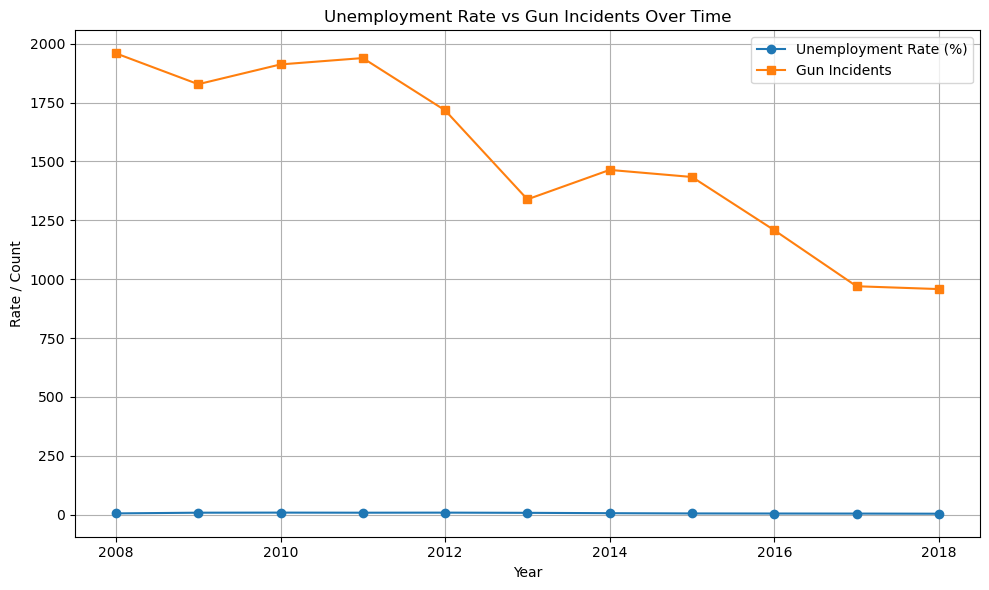

In [171]:
import matplotlib.pyplot as plt

yearly_data = combined_df.groupby('year')[['unemployment_rate', 'gun_incidents_x']].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['year'], yearly_data['unemployment_rate'], marker='o', label='Unemployment Rate (%)')
plt.plot(yearly_data['year'], yearly_data['gun_incidents_x'], marker='s', label='Gun Incidents')

plt.title('Unemployment Rate vs Gun Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Rate / Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [173]:
combined_df

,date,boro,borough,total_grads_of_cohort,dropped_out_of_cohort,Bronx,Brooklyn,Queens,year,gun_incidents_x,gun_incidents_y,unemployment_rate_x,unemployment_rate_y,unemployment_rate
0,2008-01-01,QUEENS,Bronx,0.507,0.157,NaN,NaN,NaN,2008,1959,1959,5.391667,5.391667,5.391667
1,2008-01-01,BROOKLYN,Bronx,0.507,0.157,NaN,NaN,NaN,2008,1959,1959,5.391667,5.391667,5.391667
2,2008-01-01,STATEN ISLAND,Bronx,0.646,0.225,NaN,NaN,NaN,2008,1959,1959,5.391667,5.391667,5.391667
3,2008-01-01,STATEN ISLAND,Bronx,0.622,0.21,NaN,NaN,NaN,2008,1959,1959,5.391667,5.391667,5.391667
4,2008-01-01,STATEN ISLAND,Bronx,0.609,0.21,NaN,NaN,NaN,2008,1959,1959,5.391667,5.391667,5.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17607,2018-12-30,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,2018,958,958,4.100000,4.100000,4.100000
17608,2018-12-30,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,2018,958,958,4.100000,4.100000,4.100000
17609,2018-12-30,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,2018,958,958,4.100000,4.100000,4.100000
17610,2018-12-31,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,2018,958,958,4.100000,4.100000,4.100000


In [75]:
# Rename columns like 'Bronx County, NY' to 'Bronx'
combined_df = combined_df.rename(columns={
    'Bronx County, NY': 'Bronx',
    'Kings County, NY': 'Brooklyn',
    'Queens County, NY': 'Queens'
})


In [77]:
# Ensure 'occur_date' is in datetime format
dfG['occur_date'] = pd.to_datetime(dfG['occur_date'])

# Filter for the relevant time range
start_date = datetime(2008, 1, 1)
end_date = datetime(2018, 12, 31)
dfG_filtered = dfG[(dfG['occur_date'] >= start_date) & (dfG['occur_date'] <= end_date)].copy()  # Use .copy() to avoid the warning

# Create a new column for the year
dfG_filtered['year'] = dfG_filtered['occur_date'].dt.year

# Count number of incidents per year
gun_incidents_per_year = dfG_filtered.groupby('year').size().reset_index(name='gun_incidents')

# Display the result
print(gun_incidents_per_year)

    year  gun_incidents
0   2008           1959
1   2009           1828
2   2010           1912
3   2011           1939
4   2012           1717
5   2013           1339
6   2014           1464
7   2015           1434
8   2016           1208
9   2017            970
10  2018            958


In [79]:
dfG['occur_date'] = pd.to_datetime(dfG['occur_date'])
dfG_filtered = dfG[(dfG['occur_date'] >= datetime(2008, 1, 1)) & (dfG['occur_date'] <= datetime(2018, 12, 31))].copy()
dfG_filtered['year'] = dfG_filtered['occur_date'].dt.year
gun_incidents_per_year = dfG_filtered.groupby('year').size().reset_index(name='gun_incidents')

# Ensure combined_df has a 'year' column
combined_df['year'] = pd.to_datetime(combined_df['date'], errors='coerce').dt.year

# Merge safely
combined_df = pd.merge(combined_df, gun_incidents_per_year, on='year', how='left')

In [83]:
print(combined_df.columns)
print(X.dtypes)
print(X.head())


Index(['date', 'boro', 'borough', 'total_grads_of_cohort',
       'dropped_out_of_cohort', 'Bronx', 'Brooklyn', 'Queens', 'year',
       'gun_incidents_x', 'gun_incidents_y'],
      dtype='object')
date                     datetime64[ns]
boro                             object
borough                          object
total_grads_of_cohort            object
dropped_out_of_cohort            object
Bronx                           float64
Brooklyn                        float64
Queens                          float64
year                              int32
gun_incidents_x                   int64
gun_incidents_y                   int64
dtype: object
        date           boro borough total_grads_of_cohort  \
0 2008-01-01         QUEENS   Bronx                 0.507   
1 2008-01-01       BROOKLYN   Bronx                 0.507   
2 2008-01-01  STATEN ISLAND   Bronx                 0.646   
3 2008-01-01  STATEN ISLAND   Bronx                 0.622   
4 2008-01-01  STATEN ISLAND   Bronx        

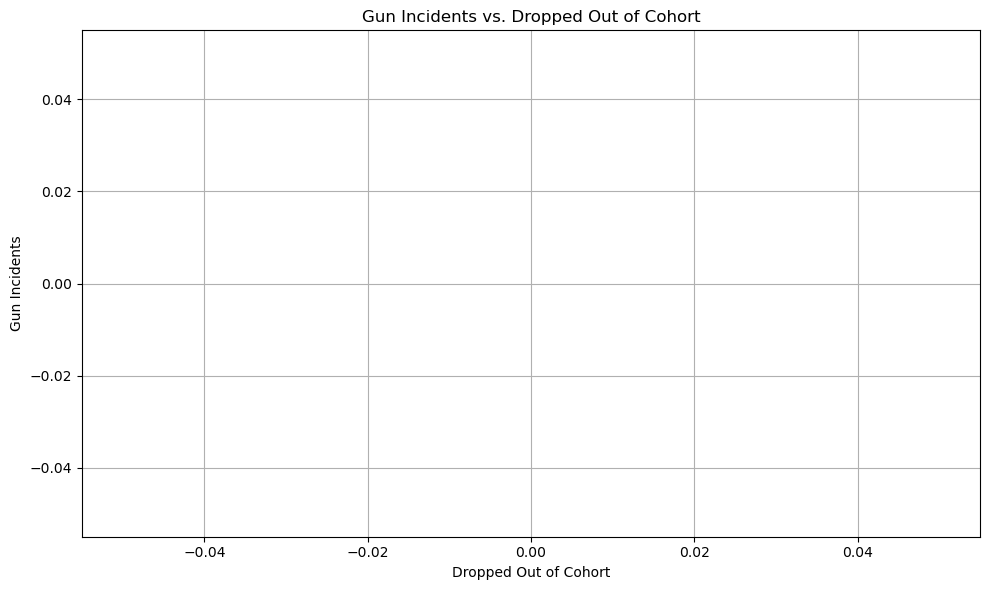

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Reset index to align data
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Combine X and y for easier plotting
data = X.copy()
data['gun_incidents'] = y

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='dropped_out_of_cohort', y='gun_incidents', data=data, line_kws={"color": "red"})

plt.title('Gun Incidents vs. Dropped Out of Cohort')
plt.xlabel('Dropped Out of Cohort')
plt.ylabel('Gun Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


In [97]:
print("NaNs in X:\n", X.isna().sum())
print("NaNs in y:\n", y.isna().sum())


NaNs in X:
 date                     0
boro                     0
borough                  0
total_grads_of_cohort    0
dropped_out_of_cohort    0
Bronx                    0
Brooklyn                 0
Queens                   0
year                     0
gun_incidents_x          0
dtype: int64
NaNs in y:
 0


In [101]:
# Convert any non-numeric columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')


In [99]:
# Check the data types of X and y
print("X dtypes:\n", X.dtypes)
print("y dtype:\n", y.dtype)


X dtypes:
 date                       int64
boro                     float64
borough                  float64
total_grads_of_cohort    float64
dropped_out_of_cohort    float64
Bronx                    float64
Brooklyn                 float64
Queens                   float64
year                       int32
gun_incidents_x            int64
dtype: object
y dtype:
 int64


In [103]:
print(X.head())
print(y.head())

Empty DataFrame
Columns: [date, boro, borough, total_grads_of_cohort, dropped_out_of_cohort, Bronx, Brooklyn, Queens, year, gun_incidents_x]
Index: []
Series([], Name: gun_incidents_y, dtype: int64)


In [87]:
# Convert all columns in X to numeric (this will force errors to be NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# Convert y to numeric as well
y = pd.to_numeric(y, errors='coerce')

# Check if there are any NaN values created during the conversion
print(X.isna().sum())  # Check for NaN in independent variables
print(y.isna().sum())  # Check for NaN in dependent variable

# Drop rows with NaN values if they exist (you can also impute values instead)
X = X.dropna()
y = y.dropna()

# Ensure that the shapes match
print(X.shape, y.shape)


const                        0
date                         0
boro                     17612
borough                  17612
total_grads_of_cohort    16682
dropped_out_of_cohort    16682
Bronx                    17556
Brooklyn                 17556
Queens                   17556
year                         0
gun_incidents_x              0
dtype: int64
0
(0, 11) (17612,)


In [105]:
# Step 1: One-hot encode categorical variables
X = pd.get_dummies(X, columns=['boro', 'borough'], drop_first=True)

# Step 2: Recheck the NaN values
print(f"NaNs in X after encoding: {X.isna().sum()}")


NaNs in X after encoding: date                     0
total_grads_of_cohort    0
dropped_out_of_cohort    0
Bronx                    0
Brooklyn                 0
Queens                   0
year                     0
gun_incidents_x          0
dtype: int64


In [107]:
print(f"NaNs in X after cleaning: {X.isna().sum()}")
print(f"NaNs in y after cleaning: {y.isna().sum()}")


NaNs in X after cleaning: date                     0
total_grads_of_cohort    0
dropped_out_of_cohort    0
Bronx                    0
Brooklyn                 0
Queens                   0
year                     0
gun_incidents_x          0
dtype: int64
NaNs in y after cleaning: 0


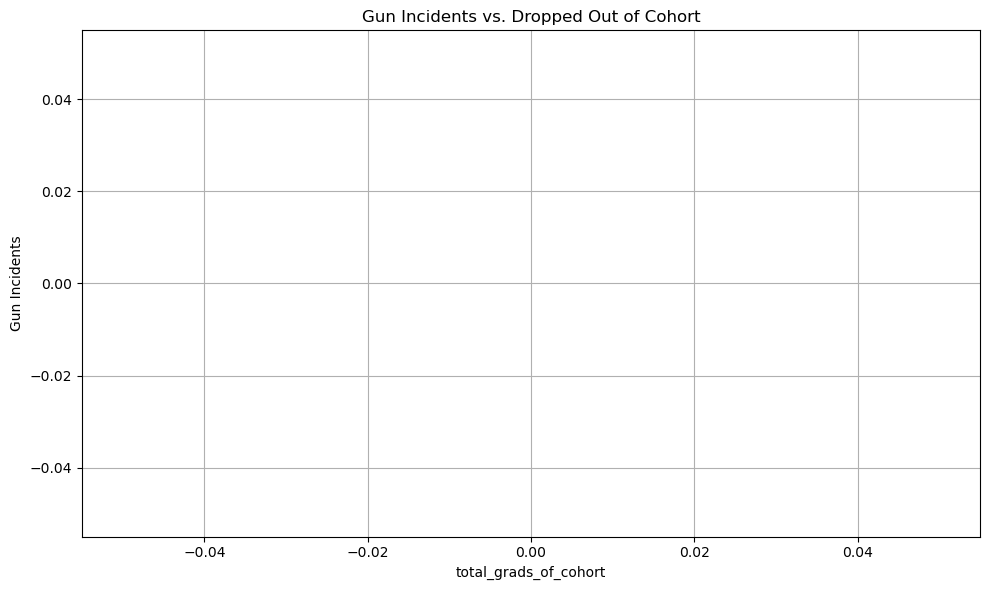

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Reset index to align data
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Combine X and y for easier plotting
data = X.copy()
data['gun_incidents'] = y

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='total_grads_of_cohort', y='gun_incidents', data=data, line_kws={"color": "red"})

plt.title('Gun Incidents vs. Dropped Out of Cohort')
plt.xlabel('total_grads_of_cohort')
plt.ylabel('Gun Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()



Shape before one-hot encoding: (17612, 11)


KeyError: "None of [Index(['boro', 'borough'], dtype='object')] are in the [columns]"

In [117]:
print(f"Rows before dropping NaNs: {len(X)}")
X = X.dropna()
y = y.loc[X.index]  # Ensure y aligns with X after dropping NaNs
print(f"Rows after dropping NaNs: {len(X)}")

Rows before dropping NaNs: 0
Rows after dropping NaNs: 0


In [119]:
X = X.fillna(X.mean())  # Impute missing values with the column mean
y = y.fillna(y.mean())  # Similarly for the target variable


In [121]:
X = sm.add_constant(X)  # Add a constant (intercept) to the independent variables
model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Output the model summary


ValueError: zero-size array to reduction operation maximum which has no identity

In [123]:
combined_df

,date,boro,borough,total_grads_of_cohort,dropped_out_of_cohort,Bronx,Brooklyn,Queens,year,gun_incidents_x,gun_incidents_y
0,2008-01-01,QUEENS,Bronx,0.507,0.157,NaN,NaN,NaN,2008,1959,1959
1,2008-01-01,BROOKLYN,Bronx,0.507,0.157,NaN,NaN,NaN,2008,1959,1959
2,2008-01-01,STATEN ISLAND,Bronx,0.646,0.225,NaN,NaN,NaN,2008,1959,1959
3,2008-01-01,STATEN ISLAND,Bronx,0.622,0.21,NaN,NaN,NaN,2008,1959,1959
4,2008-01-01,STATEN ISLAND,Bronx,0.609,0.21,NaN,NaN,NaN,2008,1959,1959
...,...,...,...,...,...,...,...,...,...,...,...
17607,2018-12-30,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,2018,958,958
17608,2018-12-30,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,2018,958,958
17609,2018-12-30,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,2018,958,958
17610,2018-12-31,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,2018,958,958
